In [128]:
# Load the required packages -
using DataFrames, CSV, Plots, Dates, Statistics

In [15]:
# Load SP500 OHLC data between 12/19 to 12/21 (SPY.csv) -
df = CSV.read(joinpath("./data/SPY.csv"), DataFrame)

# Sort the data from 12/21 to 12/19 -
sort!(df, [order(:timestamp, rev=true), :close]);

In [165]:
# Set parameters -
λ_parameter = 0.0;
window_length = 252;

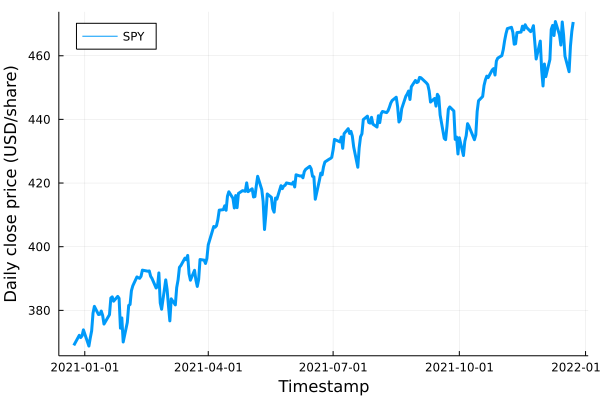

In [166]:
T = df[1:window_length,:timestamp]
C = df[1:window_length,:close]
plot(T,C, label="SPY", lw=3, legend=:topleft)
xlabel!("Timestamp", fontsize=18)
ylabel!("Daily close price (USD/share)", fontsize=18)

In [167]:
(weights, terms, μ) = expectation(df; λ = λ_parameter, window = window_length);

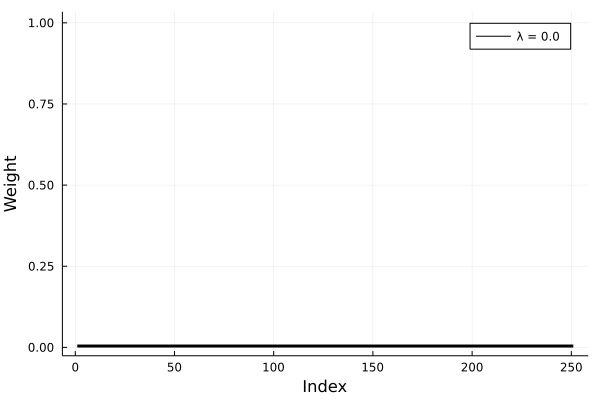

In [175]:
plot(weights, lw=3, label="λ = $(λ_parameter)", color=:black)
xlabel!("Index", fontsize=18)
ylabel!("Weight", fontsize=18)

In [170]:
μ

0.0009049341908898838

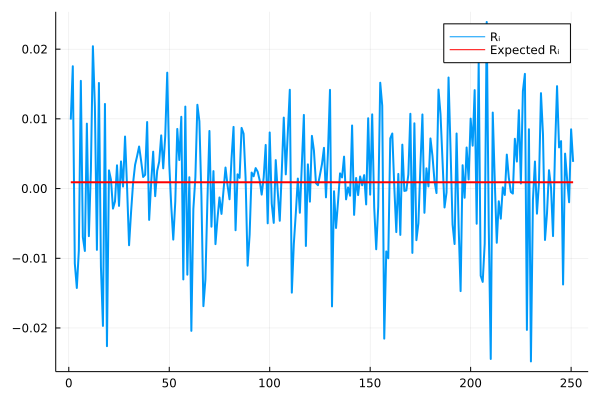

In [174]:
Z = ones(length(terms))*mean(terms)
plot(terms, lw=2, label="Rᵢ")
plot!(Z,c=:red, lw=2, label="Expected Rᵢ")

In [109]:
function expectation(data::DataFrame; 
        λ::Float64 = 1.0, window::Int64 = 30, risk_free_rate::Float64=(0.02/365.0))
    
    # initialize -
    terms = Vector{Float64}()
    weights = Vector{Float64}()
    
    for t ∈ 2:window
        
        # get the price data -
        P₁ = data[t, :close]
        P₀ = data[t+1, :close]
        
        # compute the return and weight -
        Rₜ = (log(P₁/P₀) - risk_free_rate);
        Wₜ = exp(-λ*t)
        term = Wₜ*Rₜ
        
        # grab W array -
        push!(weights, Wₜ)
        
        # capture -
        push!(terms, term)
    end
    
    # compute Z -
    Z = sum(weights)
    
    # return -
    return ((1/Z)*weights, terms, (1/Z)*sum(terms))
end

expectation (generic function with 1 method)